**(1) Importing the libraries**

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**(2) Importing the datasets**

In [103]:
books_dataset = pd.read_csv('books.csv', usecols=['id', 'book_id', 'books_count', 'isbn', 'authors', 'original_title', 'average_rating', 'ratings_count', 'work_ratings_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5' ])
rating_dataset = pd.read_csv('ratings.csv', usecols=['book_id', 'user_id', 'rating'])

In [104]:
books_dataset.head()

,id,book_id,books_count,isbn,authors,original_title,average_rating,ratings_count,work_ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,272,439023483,Suzanne Collins,The Hunger Games,4.34,4780653,4942365,66715,127936,560092,1481305,2706317
1,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543
2,3,41865,226,316015849,Stephenie Meyer,Twilight,3.57,3866839,3916824,456191,436802,793319,875073,1355439
3,4,2657,487,61120081,Harper Lee,To Kill a Mockingbird,4.25,3198671,3340896,60427,117415,446835,1001952,1714267
4,5,4671,1356,743273567,F. Scott Fitzgerald,The Great Gatsby,3.89,2683664,2773745,86236,197621,606158,936012,947718


In [105]:
print(books_dataset.shape)

(10000, 14)


In [106]:
rating_dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


**(3) Removing the duplicate row for column 'book_id', if there is any...**

In [107]:
new_books_dataset = books_dataset.drop_duplicates(subset = "book_id")
new_books_dataset.head()

,id,book_id,books_count,isbn,authors,original_title,average_rating,ratings_count,work_ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,272,439023483,Suzanne Collins,The Hunger Games,4.34,4780653,4942365,66715,127936,560092,1481305,2706317
1,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543
2,3,41865,226,316015849,Stephenie Meyer,Twilight,3.57,3866839,3916824,456191,436802,793319,875073,1355439
3,4,2657,487,61120081,Harper Lee,To Kill a Mockingbird,4.25,3198671,3340896,60427,117415,446835,1001952,1714267
4,5,4671,1356,743273567,F. Scott Fitzgerald,The Great Gatsby,3.89,2683664,2773745,86236,197621,606158,936012,947718


In [108]:
print(new_books_dataset.shape)

(10000, 14)


**Note: Rating in rating_dataset in integer rather than float**

**(4) Depicting the rating graph for a book**

In [109]:
b_id = int(input("Enter the book id= "))

Enter the book id= 3


In [110]:
id_ls = list(new_books_dataset.iloc[:,1:2].values)

print(id_ls)

[array([2767052]), array([3]), array([41865]), array([2657]), array([4671]), array([11870085]), array([5907]), array([5107]), array([960]), array([1885]), array([77203]), array([13335037]), array([5470]), array([7613]), array([48855]), array([2429135]), array([6148028]), array([5]), array([34]), array([7260188]), array([2]), array([12232938]), array([15881]), array([6]), array([136251]), array([968]), array([1]), array([7624]), array([18135]), array([8442457]), array([4667024]), array([890]), array([930]), array([10818853]), array([865]), array([3636]), array([100915]), array([14050]), array([13496]), array([19501]), array([28187]), array([1934]), array([10210]), array([15931]), array([4214]), array([43641]), array([19063]), array([4381]), array([49041]), array([30119]), array([256683]), array([428263]), array([113436]), array([11]), array([5129]), array([1162543]), array([37435]), array([2956]), array([24178]), array([1618]), array([22557272]), array([119322]), array([6185]), array([1

In [111]:
i = id_ls.index(b_id)
print(i)

1


In [112]:
import numpy as np

RATE1: [[456191]]

 --------------- 

RATE2: [[436802]]

 --------------- 

RATE3: [[793319]]

 --------------- 

RATE4: [[875073]]

 --------------- 

RATE5: [[1355439]]

 --------------- 

Observing the count of rating of books ['Twilight']




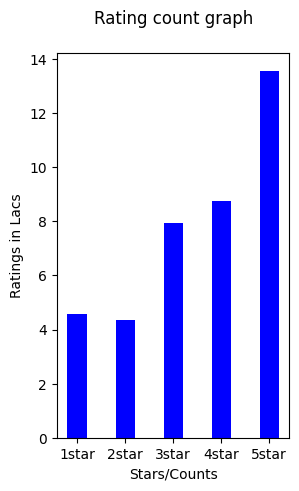

In [113]:
if b_id in id_ls:

  #-----Finding out the range of rating 1-----

  rate1_range = new_books_dataset.iloc[i+1:i+2, 9:10].values

  print("RATE1:",rate1_range)

  RATE1 = (rate1_range)/100000

  print("\n --------------- \n")

  #-----Finding out the range of rating 2-----

  rate2_range = new_books_dataset.iloc[i+1:i+2, 10:11].values

  print("RATE2:",rate2_range)

  RATE2 = (rate2_range)/100000

  print("\n --------------- \n")

  #-----Finding out the range of rating 3-----

  rate3_range = new_books_dataset.iloc[i+1:i+2, 11:12].values

  print("RATE3:",rate3_range)

  RATE3 = (rate3_range)/100000

  print("\n --------------- \n")

  #-----Finding out the range of rating 4-----

  rate4_range = new_books_dataset.iloc[i+1:i+2, 12:13].values

  print("RATE4:",rate4_range)

  RATE4 = (rate4_range)/100000

  print("\n --------------- \n")

  #-----Finding out the range of rating 5-----

  rate5_range = new_books_dataset.iloc[i+1:i+2, 13:14].values

  print("RATE5:",rate5_range)

  RATE5 = (rate5_range)/100000

  print("\n --------------- \n")

  book_name = str(np.ravel(new_books_dataset.iloc[i+1:i+2, 5:6].values))

  print("Observing the count of rating of books", book_name)
  print("\n")

  ratings = {'1star' : RATE1, '2star' : RATE2, '3star' : RATE3, '4star' : RATE4, '5star' : RATE5}

  ratings_type = list(ratings.keys())
  ratings_values = list(ratings.values())


  #converting the 2d array into 1d array
  new_ratings_type = np.ravel(ratings_type)
  new_ratings_values = np.ravel(ratings_values)

  fig = plt.figure(figsize = (3, 5))

  plt.bar(new_ratings_type, new_ratings_values, color = 'blue', width= 0.4)


  plt.title('Rating count graph\n')
  plt.xlabel('Stars/Counts')
  plt.ylabel('Ratings in Lacs')
  plt.show()
  

else:
  print("No books with id",b_id,"is found in dataset")

**(5) Merging the Table of "userid", with Table of "new_books_dataset"**

In [114]:
merged_rating_dataset = pd.merge(new_books_dataset, rating_dataset, on='book_id')

merged_rating_dataset.head()

,id,book_id,books_count,isbn,authors,original_title,average_rating,ratings_count,work_ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,user_id,rating
0,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,314,3
1,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,588,1
2,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,2077,2
3,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,2487,3
4,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,2900,3


**(6) Filtering the books whose total ratings is less than 2500**

Here we will use the threshold value to decided the proper consdered ratings

In [116]:
filter_threshold_value = 2500

new_rating_dataset = merged_rating_dataset.query('work_ratings_count >= @filter_threshold_value')

new_rating_dataset.head()

,id,book_id,books_count,isbn,authors,original_title,average_rating,ratings_count,work_ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,user_id,rating
0,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,314,3
1,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,588,1
2,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,2077,2
3,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,2487,3
4,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,2900,3


**(7) Drop down the column "rating" which is 'int', rather than 'float'**

In [117]:
#dropping the column

new_rating_dataset.drop(['rating'], axis=1, inplace=True)

new_rating_dataset.head()

,id,book_id,books_count,isbn,authors,original_title,average_rating,ratings_count,work_ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,user_id
0,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,314
1,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,588
2,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,2077
3,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,2487
4,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,4800065,75504,101676,455024,1156318,3011543,2900


In [118]:
new_rating_dataset.shape

(79701, 15)

**(8) Creating the Feature Pivot Matrix**

In [121]:
new_rating_dataset_df = new_rating_dataset.pivot_table(index = 'original_title', columns = 'user_id', values = 'average_rating').fillna(0)

new_rating_dataset_df.head()

user_id,2,3,4,7,9,10,11,14,15,20,22,23,24,27,29,31,35,36,40,41,46,47,49,51,52,55,57,60,61,62,69,75,82,83,87,89,90,93,95,96,...,53342,53344,53345,53348,53349,53350,53352,53354,53355,53356,53357,53364,53366,53371,53372,53373,53374,53377,53378,53381,53382,53388,53389,53390,53391,53393,53398,53400,53401,53403,53404,53406,53408,53409,53416,53419,53420,53422,53423,53424
original_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Animal Farm & 1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Carter Beats the Devil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Fellowship of the Ring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
from scipy.sparse import csr_matrix

rating_dataset_matrix = csr_matrix(new_rating_dataset_df.values)

**(9) Implementing the K-NN Algorithm**

In [124]:
from sklearn.neighbors import NearestNeighbors
KNN = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm = 'brute')
KNN.fit(rating_dataset_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [125]:
new_rating_dataset_df.shape

(794, 28554)

In [127]:
query_index = np.random.choice(new_rating_dataset_df.shape[0])
print(query_index)
distances, indices = KNN.kneighbors(new_rating_dataset_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

314


In [128]:
new_rating_dataset_df.head()

user_id,2,3,4,7,9,10,11,14,15,20,22,23,24,27,29,31,35,36,40,41,46,47,49,51,52,55,57,60,61,62,69,75,82,83,87,89,90,93,95,96,...,53342,53344,53345,53348,53349,53350,53352,53354,53355,53356,53357,53364,53366,53371,53372,53373,53374,53377,53378,53381,53382,53388,53389,53390,53391,53393,53398,53400,53401,53403,53404,53406,53408,53409,53416,53419,53420,53422,53423,53424
original_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Animal Farm & 1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Carter Beats the Devil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Fellowship of the Ring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**(10) Final Recommendation using Cosine Similarity**

In [129]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(new_rating_dataset_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, new_rating_dataset_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Le città invisibili:

1: Rachael Ray 365: No Repeats--A Year of Deliciously Different Dinners (A 30-Minute Meal Cookbook), with distance of 0.9680778800965469:
2: Amsterdam, with distance of 0.9685859568781229:
3: Fried Green Tomatoes at the Whistle Stop Cafe, with distance of 0.9767378947400382:
4: The Good Soldier, with distance of 0.9778596278614976:
5: So Long, and Thanks for All the Fish, with distance of 0.979380347528942:
